In [1]:
%matplotlib inline
import pandas
import math
import matplotlib
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import cv2
from skimage.transform import hough_line, hough_line_peaks,probabilistic_hough_line
from skimage.feature import canny
import skimage.io as io

In [2]:
data = pandas.read_csv('../data/20151119---SAMPLE2-PHREE-100XMEOH-MOBILITY_dt_temp_Apex3DIons.csv')
m_z = data.m_z.tolist()
rt = data.rt.tolist()
inten = data.inten.tolist()

In [3]:
print('RT:','min:',min(rt),'max:',max(rt),'dynamic range:',max(rt)-min(rt))
print('m/z:','min:',min(m_z),'max:',max(m_z),'dynamic range:',max(m_z)-min(m_z))
print('intensity:','min:',min(inten),'max:',max(inten),'dynamic range:',max(inten)-min(inten))

RT: min: 1.5118 max: 197.4992 dynamic range: 195.9874
m/z: min: 50.0828 max: 999.9721 dynamic range: 949.8893
intensity: min: 10 max: 2048592 dynamic range: 2048582


In [4]:
RT_min=min(rt)
m_z_min=min(m_z)
data.inten=data.inten/min(inten)
inten = data.inten.tolist()

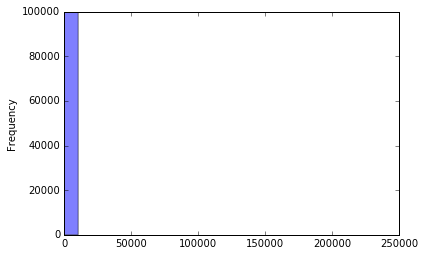

In [5]:
data.inten.plot(kind='hist', alpha=0.5,bins=10)

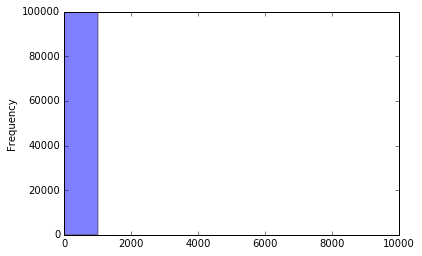

In [6]:
data.inten.plot(kind='hist', alpha=0.5,bins=10,range=(0,10000))

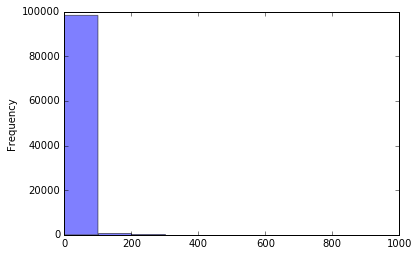

In [7]:
data.inten.plot(kind='hist', alpha=0.5,bins=10,range=(0,1000))

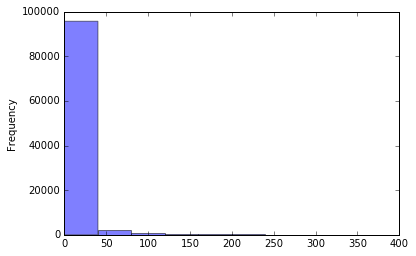

In [8]:
data.inten.plot(kind='hist', alpha=0.5,bins=10,range=(0,400))

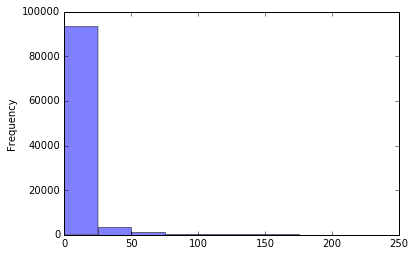

In [9]:
data.inten.plot(kind='hist', alpha=0.5,bins=10,range=(0,250))

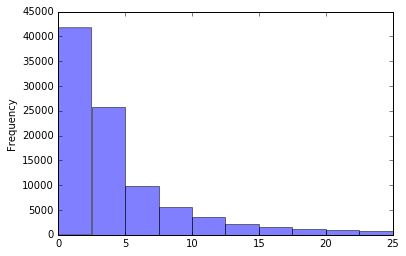

In [10]:
data.inten.plot(kind='hist', alpha=0.5,bins=10,range=(0,25))

(array([  9.99000000e+04,   0.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   4.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  1.00000000e+00,   2.04868200e+04,   4.09726400e+04,
          6.14584600e+04,   8.19442800e+04,   1.02430100e+05,
          1.22915920e+05,   1.43401740e+05,   1.63887560e+05,
          1.84373380e+05,   2.04859200e+05]),
 <a list of 10 Patch objects>)

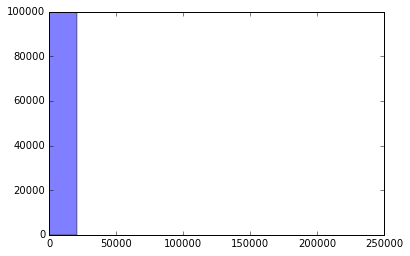

In [14]:
plt.hist(data.inten,alpha=0.5)

(array([ 1434.,   703.,   440.,   295.,   201.,   150.,   104.,    70.,
           43.,    18.]),
 array([  100.,   190.,   280.,   370.,   460.,   550.,   640.,   730.,
          820.,   910.,  1000.]),
 <a list of 10 Patch objects>)

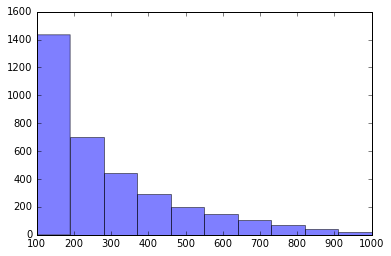

In [21]:
plt.hist(data.inten,alpha=0.5,cumulative=-1,range=(100,1000))

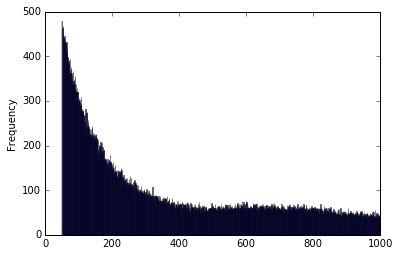

In [6]:
data.m_z.plot(kind='hist', alpha=0.5,bins=1000)

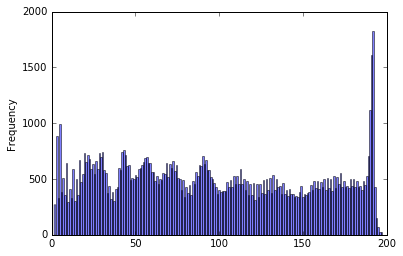

In [7]:
data.rt.plot(kind='hist', alpha=0.5,bins=200)

In [8]:
img=Image.new("F", (200,1000))

In [9]:
rt_step=(max(rt)-min(rt))/(200-1)
m_z_step=(max(m_z)-min(m_z))/(1000-1)

In [10]:
buffer = img.load()
for peak in zip(rt,m_z,inten):
    buffer[int((peak[0]-min(rt))/rt_step),int((peak[1]-min(m_z))/m_z_step)]+=peak[2]

In [11]:
img.show()

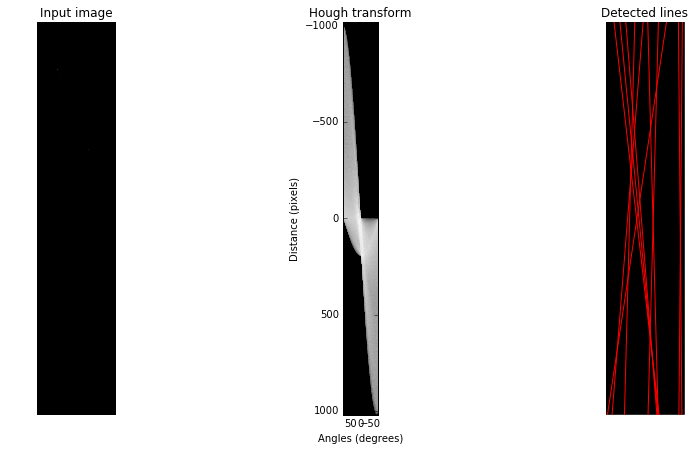

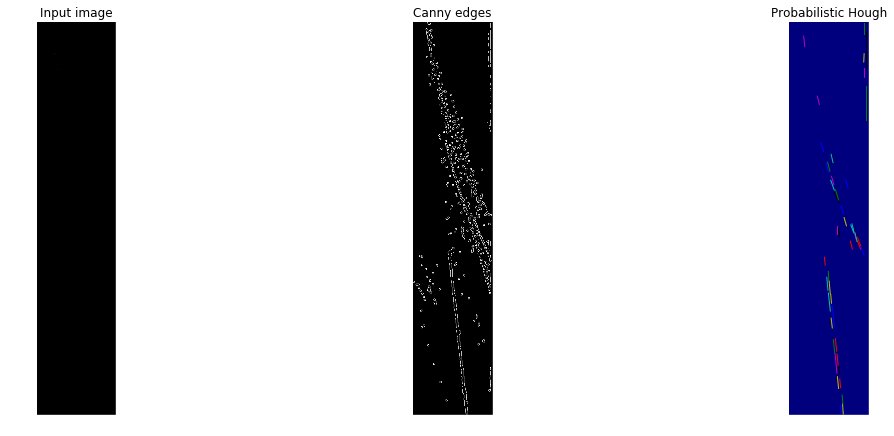

In [13]:
#sci-kit image
gray=np.array(img)
h, theta, d = hough_line(gray)
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12, 6))
plt.tight_layout()
# Generating figure 1.
ax0.imshow(gray, cmap=cm.gray)
ax0.set_title('Input image')
ax0.set_axis_off()

ax1.imshow(np.log(1 + h), extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]),d[-1], d[0]], cmap=cm.gray, aspect=1/1.5)
ax1.set_title('Hough transform')
ax1.set_xlabel('Angles (degrees)')
ax1.set_ylabel('Distance (pixels)')
ax1.axis('image')

ax2.imshow(gray, cmap=cm.gray)
row1, col1 = gray.shape
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - col1 * np.cos(angle)) / np.sin(angle)
    ax2.plot((0, col1), (y0, y1), '-r')
ax2.axis((0, col1, row1, 0))
ax2.set_title('Detected lines')
ax2.set_axis_off()
# Line finding using the Probabilistic Hough Transform.
gray=np.array(img)
edges = canny(gray, 2, 1, 25)
lines = probabilistic_hough_line(edges, threshold=10, line_length=20,line_gap=3)

# Generating figure 2.
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(16, 6), sharex=True,sharey=True)
plt.tight_layout()

ax0.imshow(gray, cmap=cm.gray)
ax0.set_title('Input image')
ax0.set_axis_off()
ax0.set_adjustable('box-forced')

ax1.imshow(edges, cmap=cm.gray)
ax1.set_title('Canny edges')
ax1.set_axis_off()
ax1.set_adjustable('box-forced')

ax2.imshow(edges * 0)
for line in lines:
    p0, p1 = line
    ax2.plot((p0[0], p1[0]), (p0[1], p1[1]))

row2, col2 = gray.shape
ax2.axis((0, col2, row2, 0))

ax2.set_title('Probabilistic Hough')
ax2.set_axis_off()
ax2.set_adjustable('box-forced')

plt.show()

In [14]:
print(np.amin(gray))
print(np.amax(gray))

0.0
209521.0
